<a href="https://colab.research.google.com/github/Geralberrio/Proyecto_Analitica/blob/master/Hospitalizacion_clasificacion_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.decomposition import PCA

from tensorflow import keras

In [ ]:
# Definamos el "random_state" para que los resultados sean reproducibles:
random_state=42

# Preprocesamiento de datos

In [ ]:
# Carguemos los datos:
data_train = pd.read_csv('./Hospitalizacion_train_data.csv', header=0)
data_train

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144.0,11-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699.0,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235.0,11-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761.0,11-20


In [ ]:
# datos de prueba, estos datos no tienen la variable objetivo porque la idea es medir como funciona el modelo para estos casos nuevos
data_test = pd.read_csv('./Hospitalizacion_test_data.csv', header=0)
data_test

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,318439,21,c,3,Z,3,gynecology,S,A,2.0,17006,2.0,Emergency,Moderate,2,71-80,3095.0
1,318440,29,a,4,X,2,gynecology,S,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4018.0
2,318441,26,b,2,Y,3,gynecology,Q,D,4.0,17006,2.0,Emergency,Moderate,3,71-80,4492.0
3,318442,6,a,6,X,3,gynecology,Q,F,2.0,17006,2.0,Trauma,Moderate,3,71-80,4173.0
4,318443,28,b,11,X,2,gynecology,R,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137052,455491,11,b,2,Y,4,anesthesia,Q,D,3.0,41160,3.0,Emergency,Minor,4,41-50,6313.0
137053,455492,25,e,1,X,2,radiotherapy,R,E,4.0,30985,7.0,Emergency,Moderate,2,0-10,3510.0
137054,455493,30,c,3,Z,2,anesthesia,R,A,4.0,81811,12.0,Urgent,Minor,2,0-10,7190.0
137055,455494,5,a,1,X,2,anesthesia,R,E,4.0,57021,10.0,Trauma,Minor,2,41-50,5435.0


In [ ]:
# Veamos la descripción del dataset:
data_train.describe(include='all')

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
count,318438.000000,318438.000000,318438,318438.000000,318438,318438.000000,318438,318438,318438,318325.000000,318438.000000,313906.000000,318438,318438,318438.000000,318438,318438.000000,318438
unique,NaN,NaN,7,NaN,3,NaN,5,6,6,NaN,NaN,NaN,3,3,NaN,10,NaN,11
top,NaN,NaN,a,NaN,X,NaN,gynecology,R,F,NaN,NaN,NaN,Trauma,Moderate,NaN,41-50,NaN,21-30
freq,NaN,NaN,143425,NaN,133336,NaN,249486,127947,112753,NaN,NaN,NaN,152261,175843,NaN,63749,NaN,87491
mean,159219.500000,18.318841,NaN,4.771717,NaN,3.197627,NaN,NaN,NaN,2.625807,65747.579472,7.251859,NaN,NaN,3.284099,NaN,4880.749392,NaN
std,91925.276847,8.633755,NaN,3.102535,NaN,1.168171,NaN,NaN,NaN,0.873146,37979.936440,4.745266,NaN,NaN,1.764061,NaN,1086.776254,NaN
min,1.000000,1.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN,NaN,0.000000,NaN,1800.000000,NaN
25%,79610.250000,11.000000,NaN,2.000000,NaN,2.000000,NaN,NaN,NaN,2.000000,32847.000000,4.000000,NaN,NaN,2.000000,NaN,4186.000000,NaN
50%,159219.500000,19.000000,NaN,5.000000,NaN,3.000000,NaN,NaN,NaN,3.000000,65724.500000,8.000000,NaN,NaN,3.000000,NaN,4741.000000,NaN
75%,238828.750000,26.000000,NaN,7.000000,NaN,4.000000,NaN,NaN,NaN,3.000000,98470.000000,8.000000,NaN,NaN,4.000000,NaN,5409.000000,NaN


In [ ]:
# Veamos la descripción del dataset test:
data_test.describe(include='all')

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
count,137057.000000,137057.000000,137057,137057.000000,137057,137057.000000,137057,137057,137057,137022.000000,137057.000000,134900.000000,137057,137057,137057.000000,137057,137057.000000
unique,NaN,NaN,7,NaN,3,NaN,5,6,6,NaN,NaN,NaN,3,3,NaN,10,NaN
top,NaN,NaN,a,NaN,X,NaN,gynecology,R,F,NaN,NaN,NaN,Trauma,Moderate,NaN,41-50,NaN
freq,NaN,NaN,61305,NaN,57513,NaN,107202,54992,48717,NaN,NaN,NaN,65411,75722,NaN,27746,NaN
mean,386967.000000,18.343747,NaN,4.758692,NaN,3.192686,NaN,NaN,NaN,2.634489,65877.903515,7.243996,NaN,NaN,3.284531,NaN,4869.731097
std,39565.092259,8.634694,NaN,3.102245,NaN,1.164250,NaN,NaN,NaN,0.869295,37942.997623,4.790625,NaN,NaN,1.777270,NaN,1080.766723
min,318439.000000,1.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,NaN,1.000000,3.000000,1.000000,NaN,NaN,0.000000,NaN,1800.000000
25%,352703.000000,11.000000,NaN,2.000000,NaN,2.000000,NaN,NaN,NaN,2.000000,32945.000000,4.000000,NaN,NaN,2.000000,NaN,4178.000000
50%,386967.000000,19.000000,NaN,5.000000,NaN,3.000000,NaN,NaN,NaN,3.000000,65786.000000,8.000000,NaN,NaN,3.000000,NaN,4731.000000
75%,421231.000000,26.000000,NaN,7.000000,NaN,4.000000,NaN,NaN,NaN,3.000000,98851.000000,8.000000,NaN,NaN,4.000000,NaN,5398.000000


In [ ]:
# Verifiquemos si hay datos faltantes:
data_train.isna().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [ ]:
data_test.isna().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                              35
patientid                               0
City_Code_Patient                    2157
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
dtype: int64

In [ ]:
# Se elimina las columnas de codigo del pacientes, id del caso y numero de visitantes debido a que no agregan valor al modelo.
data_train.drop(columns=['City_Code_Patient','Visitors with Patient','case_id'],inplace=True)
data_test.drop(columns=['City_Code_Patient','Visitors with Patient','case_id'],inplace=True)

In [ ]:
# Eliminemos los registros de bed grade que esten vacios
data_train.dropna(inplace=True)
data_test.dropna(inplace=True)

In [ ]:
#Comprobamos que no hay más datos nulos
data_train.isna().sum()

Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
patientid                            0
Type of Admission                    0
Severity of Illness                  0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

In [ ]:
data_test.isna().sum()

Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
patientid                            0
Type of Admission                    0
Severity of Illness                  0
Age                                  0
Admission_Deposit                    0
dtype: int64

In [ ]:
#se convierte la columna admission deposit en un entero
data_train['Admission_Deposit'] = data_train['Admission_Deposit'].astype('int')
#se convierte la columna admission deposit en un entero del conjunto de test.
data_test['Admission_Deposit'] = data_test['Admission_Deposit'].astype('int')

In [ ]:
#Se aplica ordinal enconding a las caracteristica de la lista
# pues usaremos modelos basados en arboles de decisión
columnas = [ 'Stay']
for col in columnas:
  print(col)
  print({i: cat for i, cat in enumerate(data_train[col].astype('category').cat.categories)})
  print('')
  data_train.loc[:, col]= data_train[col].astype('category').cat.codes


Stay
{0: '0-10', 1: '11-20', 2: '21-30', 3: '31-40', 4: '41-50', 5: '51-60', 6: '61-70', 7: '71-80', 8: '81-90', 9: '91-100', 10: 'More than 100 Days'}



In [ ]:
#Se aplica el one-hot enconding para las columnas de Departamento del hospital, tipo de admisión y severidad de la enfermedad.
columnas = ['Department','Type of Admission','Severity of Illness','Ward_Type','Ward_Facility_Code','Hospital_type_code','Hospital_region_code','Hospital_code','City_Code_Hospital','Bed Grade','Age']
for col in columnas:
    data_train= pd.concat([data_train.drop(columns=col), pd.get_dummies(data_train[col], prefix=col)], axis=1)

In [ ]:
#dataset final
data_train

,Available Extra Rooms in Hospital,patientid,Admission_Deposit,Stay,Department_TB & Chest disease,Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,Type of Admission_Emergency,...,Age_0-10,Age_11-20,Age_21-30,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Age_71-80,Age_81-90,Age_91-100
0,3,31397,4911,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
1,2,31397,5954,4,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2,31397,4745,3,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2,31397,7272,4,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2,31397,5558,4,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,3,86499,4144,1,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
318434,2,325,6699,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
318435,3,125235,4235,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
318436,3,91081,3761,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


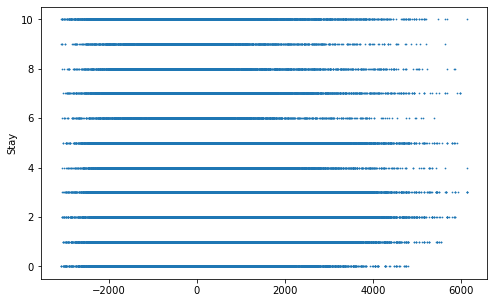

In [ ]:
# Visualicemos los datos reducidos a dos dimensiones:

data_train.reset_index(drop=True, inplace=True)

pca = PCA(1)
z = pca.fit_transform(data_train.drop(columns=['Stay', 'patientid']))

fig, ax = plt.subplots()
ax.scatter(z, data_train['Stay'], s=0.5)
ax.set_ylabel('Stay')
fig.set_size_inches(1.6*5, 5)



# Modelo con todos los datos

In [ ]:
# Separemos los datos en conjuntos de entrenamiento (70 %), validación (15 %) y prueba (15 %):

X_train, X_test, y_train, y_test = train_test_split(
    data_train.drop(columns=['Stay', 'patientid']),
    data_train['Stay'],
    test_size=0.3,
    random_state=random_state
)

X_val, X_test, y_val, y_test = train_test_split(
    X_test,
    y_test,
    test_size=0.5,
    random_state=random_state
)

In [ ]:
# Definamos un modelo secuencial de Keras:
model = keras.Sequential([
    keras.layers.BatchNormalization(input_shape=(92,)),
    keras.layers.Dense(128, activation='tanh'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='tanh'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(32, activation='tanh'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(16, activation='tanh'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1),
])

In [ ]:
# Veamos la descripción del modelo:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_38 (Batc (None, 92)                368       
_________________________________________________________________
dense_38 (Dense)             (None, 128)               11904     
_________________________________________________________________
batch_normalization_39 (Batc (None, 128)               512       
_________________________________________________________________
dense_39 (Dense)             (None, 64)                8256      
_________________________________________________________________
batch_normalization_40 (Batc (None, 64)                256       
_________________________________________________________________
dense_40 (Dense)             (None, 32)                2080      
_________________________________________________________________
batch_normalization_41 (Batc (None, 32)               

In [ ]:
# Compilemos el modelo con una función de pérdida, un optimizador y el MAE como
# una métrica a seguir:
model.compile(
    loss='mse',
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    metrics=['mae']
)

In [ ]:
%%time
# Entrenemos el modelo:
model.fit(
    X_train, y_train,
    epochs=500,
    batch_size=1024,
    validation_data=(X_val, y_val),
    validation_batch_size=len(X_val)
)


Epoch 1/500
218/218 [==============================] - 7s 10ms/step - loss: 4.7161 - mae: 1.5902 - val_loss: 4.4793 - val_mae: 1.4814
Epoch 2/500
218/218 [==============================] - 1s 6ms/step - loss: 4.0453 - mae: 1.4837 - val_loss: 4.0778 - val_mae: 1.4749
Epoch 3/500
218/218 [==============================] - 1s 6ms/step - loss: 4.0051 - mae: 1.4746 - val_loss: 4.0539 - val_mae: 1.4623
Epoch 4/500
218/218 [==============================] - 1s 6ms/step - loss: 3.9795 - mae: 1.4687 - val_loss: 4.0250 - val_mae: 1.4652
Epoch 5/500
218/218 [==============================] - 1s 6ms/step - loss: 3.9599 - mae: 1.4647 - val_loss: 4.0141 - val_mae: 1.4702
Epoch 6/500
218/218 [==============================] - 1s 6ms/step - loss: 3.9417 - mae: 1.4611 - val_loss: 4.0354 - val_mae: 1.4522
Epoch 7/500
218/218 [==============================] - 1s 6ms/step - loss: 3.9296 - mae: 1.4590 - val_loss: 4.0130 - val_mae: 1.4847
Epoch 8/500
218/218 [==============================] - 1s 6ms/step -

218/218 [==============================] - 1s 6ms/step - loss: 3.8865 - mae: 1.4527 - val_loss: 4.0204 - val_mae: 1.4668
Epoch 63/500
218/218 [==============================] - 1s 6ms/step - loss: 3.8869 - mae: 1.4504 - val_loss: 4.0599 - val_mae: 1.5110
Epoch 64/500
218/218 [==============================] - 1s 6ms/step - loss: 3.8922 - mae: 1.4535 - val_loss: 4.0406 - val_mae: 1.4627
Epoch 65/500
218/218 [==============================] - 1s 7ms/step - loss: 3.9021 - mae: 1.4552 - val_loss: 4.0397 - val_mae: 1.4596
Epoch 66/500
218/218 [==============================] - 2s 7ms/step - loss: 3.8998 - mae: 1.4544 - val_loss: 4.0548 - val_mae: 1.4982
Epoch 67/500
218/218 [==============================] - 1s 6ms/step - loss: 3.8954 - mae: 1.4535 - val_loss: 4.0422 - val_mae: 1.4579
Epoch 68/500
218/218 [==============================] - 1s 6ms/step - loss: 3.8962 - mae: 1.4540 - val_loss: 4.0836 - val_mae: 1.4532
Epoch 69/500
218/218 [==============================] - 1s 6ms/step - loss:

Epoch 123/500
218/218 [==============================] - 1s 6ms/step - loss: 3.9913 - mae: 1.4747 - val_loss: 4.0652 - val_mae: 1.4736
Epoch 124/500
218/218 [==============================] - 1s 6ms/step - loss: 3.9972 - mae: 1.4747 - val_loss: 4.1305 - val_mae: 1.5389
Epoch 125/500
218/218 [==============================] - 1s 7ms/step - loss: 4.0017 - mae: 1.4753 - val_loss: 4.0730 - val_mae: 1.4690
Epoch 126/500
218/218 [==============================] - 1s 7ms/step - loss: 3.9930 - mae: 1.4741 - val_loss: 4.0749 - val_mae: 1.5082
Epoch 127/500
218/218 [==============================] - 1s 6ms/step - loss: 3.9898 - mae: 1.4723 - val_loss: 4.0900 - val_mae: 1.4988
Epoch 128/500
218/218 [==============================] - 1s 6ms/step - loss: 3.9929 - mae: 1.4737 - val_loss: 4.0516 - val_mae: 1.4843
Epoch 129/500
218/218 [==============================] - 1s 6ms/step - loss: 3.9962 - mae: 1.4744 - val_loss: 4.0521 - val_mae: 1.4743
Epoch 130/500
218/218 [==============================] 

218/218 [==============================] - 1s 7ms/step - loss: 4.0127 - mae: 1.4768 - val_loss: 4.1018 - val_mae: 1.5096
Epoch 184/500
218/218 [==============================] - 1s 7ms/step - loss: 4.0204 - mae: 1.4785 - val_loss: 4.0764 - val_mae: 1.4873
Epoch 185/500
218/218 [==============================] - 1s 6ms/step - loss: 4.0355 - mae: 1.4828 - val_loss: 4.0912 - val_mae: 1.4914
Epoch 186/500
218/218 [==============================] - 1s 7ms/step - loss: 4.0253 - mae: 1.4804 - val_loss: 4.0836 - val_mae: 1.4875
Epoch 187/500
218/218 [==============================] - 1s 7ms/step - loss: 4.0265 - mae: 1.4802 - val_loss: 4.0782 - val_mae: 1.4926
Epoch 188/500
218/218 [==============================] - 1s 7ms/step - loss: 4.0387 - mae: 1.4828 - val_loss: 4.0826 - val_mae: 1.4842
Epoch 189/500
218/218 [==============================] - 1s 7ms/step - loss: 4.0412 - mae: 1.4830 - val_loss: 4.1015 - val_mae: 1.4886
Epoch 190/500
218/218 [==============================] - 1s 7ms/step 

Epoch 244/500
218/218 [==============================] - 1s 6ms/step - loss: 4.0906 - mae: 1.4934 - val_loss: 4.1155 - val_mae: 1.4914
Epoch 245/500
218/218 [==============================] - 1s 7ms/step - loss: 4.0842 - mae: 1.4922 - val_loss: 4.1425 - val_mae: 1.5274
Epoch 246/500
218/218 [==============================] - 1s 6ms/step - loss: 4.0842 - mae: 1.4920 - val_loss: 4.1312 - val_mae: 1.4794
Epoch 247/500
218/218 [==============================] - 1s 6ms/step - loss: 4.0936 - mae: 1.4948 - val_loss: 4.1075 - val_mae: 1.4985
Epoch 248/500
218/218 [==============================] - 1s 7ms/step - loss: 4.0931 - mae: 1.4930 - val_loss: 4.1171 - val_mae: 1.5107
Epoch 249/500
218/218 [==============================] - 1s 7ms/step - loss: 4.0883 - mae: 1.4935 - val_loss: 4.1808 - val_mae: 1.4786
Epoch 250/500
218/218 [==============================] - 1s 7ms/step - loss: 4.0837 - mae: 1.4924 - val_loss: 4.1264 - val_mae: 1.4887
Epoch 251/500
218/218 [==============================] 

218/218 [==============================] - 1s 6ms/step - loss: 4.2060 - mae: 1.5192 - val_loss: 4.2184 - val_mae: 1.5327
Epoch 305/500
218/218 [==============================] - 1s 6ms/step - loss: 4.1931 - mae: 1.5167 - val_loss: 4.2546 - val_mae: 1.5540
Epoch 306/500
218/218 [==============================] - 1s 7ms/step - loss: 4.2053 - mae: 1.5177 - val_loss: 4.2417 - val_mae: 1.5185
Epoch 307/500
218/218 [==============================] - 1s 6ms/step - loss: 4.2183 - mae: 1.5209 - val_loss: 4.2683 - val_mae: 1.5593
Epoch 308/500
218/218 [==============================] - 1s 6ms/step - loss: 4.2359 - mae: 1.5245 - val_loss: 4.2694 - val_mae: 1.5661
Epoch 309/500
218/218 [==============================] - 1s 6ms/step - loss: 4.2219 - mae: 1.5237 - val_loss: 4.2317 - val_mae: 1.5160
Epoch 310/500
218/218 [==============================] - 1s 6ms/step - loss: 4.2008 - mae: 1.5173 - val_loss: 4.2586 - val_mae: 1.5732
Epoch 311/500
218/218 [==============================] - 1s 6ms/step 

Epoch 365/500
218/218 [==============================] - 2s 7ms/step - loss: 4.1872 - mae: 1.5167 - val_loss: 4.2026 - val_mae: 1.5011
Epoch 366/500
218/218 [==============================] - 1s 6ms/step - loss: 4.1821 - mae: 1.5150 - val_loss: 4.2134 - val_mae: 1.5184
Epoch 367/500
218/218 [==============================] - 1s 6ms/step - loss: 4.1905 - mae: 1.5167 - val_loss: 4.2307 - val_mae: 1.5199
Epoch 368/500
218/218 [==============================] - 1s 6ms/step - loss: 4.1848 - mae: 1.5152 - val_loss: 4.2219 - val_mae: 1.5234
Epoch 369/500
218/218 [==============================] - 1s 6ms/step - loss: 4.1916 - mae: 1.5170 - val_loss: 4.2611 - val_mae: 1.4921
Epoch 370/500
218/218 [==============================] - 1s 6ms/step - loss: 4.1767 - mae: 1.5141 - val_loss: 4.2124 - val_mae: 1.5067
Epoch 371/500
218/218 [==============================] - 1s 6ms/step - loss: 4.1714 - mae: 1.5113 - val_loss: 4.2375 - val_mae: 1.4933
Epoch 372/500
218/218 [==============================] 

218/218 [==============================] - 1s 7ms/step - loss: 4.2149 - mae: 1.5186 - val_loss: 4.2676 - val_mae: 1.5723
Epoch 426/500
218/218 [==============================] - 1s 7ms/step - loss: 4.2141 - mae: 1.5200 - val_loss: 4.2596 - val_mae: 1.5534
Epoch 427/500
218/218 [==============================] - 1s 7ms/step - loss: 4.2114 - mae: 1.5190 - val_loss: 4.3036 - val_mae: 1.4892
Epoch 428/500
218/218 [==============================] - 1s 6ms/step - loss: 4.2080 - mae: 1.5169 - val_loss: 4.2414 - val_mae: 1.5143
Epoch 429/500
218/218 [==============================] - 1s 6ms/step - loss: 4.2127 - mae: 1.5185 - val_loss: 4.2914 - val_mae: 1.5145
Epoch 430/500
218/218 [==============================] - 2s 7ms/step - loss: 4.2350 - mae: 1.5254 - val_loss: 4.2798 - val_mae: 1.5658
Epoch 431/500
218/218 [==============================] - 2s 7ms/step - loss: 4.2266 - mae: 1.5230 - val_loss: 4.2657 - val_mae: 1.5141
Epoch 432/500
218/218 [==============================] - 1s 7ms/step 

Epoch 486/500
218/218 [==============================] - 1s 7ms/step - loss: 4.2618 - mae: 1.5288 - val_loss: 4.3024 - val_mae: 1.5631
Epoch 487/500
218/218 [==============================] - 1s 6ms/step - loss: 4.2660 - mae: 1.5295 - val_loss: 4.2829 - val_mae: 1.5568
Epoch 488/500
218/218 [==============================] - 1s 6ms/step - loss: 4.2692 - mae: 1.5300 - val_loss: 4.2996 - val_mae: 1.5249
Epoch 489/500
218/218 [==============================] - 1s 7ms/step - loss: 4.2659 - mae: 1.5288 - val_loss: 4.2951 - val_mae: 1.5787
Epoch 490/500
218/218 [==============================] - 1s 7ms/step - loss: 4.2344 - mae: 1.5239 - val_loss: 4.2529 - val_mae: 1.5326
Epoch 491/500
218/218 [==============================] - 1s 7ms/step - loss: 4.2374 - mae: 1.5240 - val_loss: 4.2698 - val_mae: 1.5432
Epoch 492/500
218/218 [==============================] - 1s 6ms/step - loss: 4.2469 - mae: 1.5265 - val_loss: 4.2735 - val_mae: 1.5569
Epoch 493/500
218/218 [==============================] 

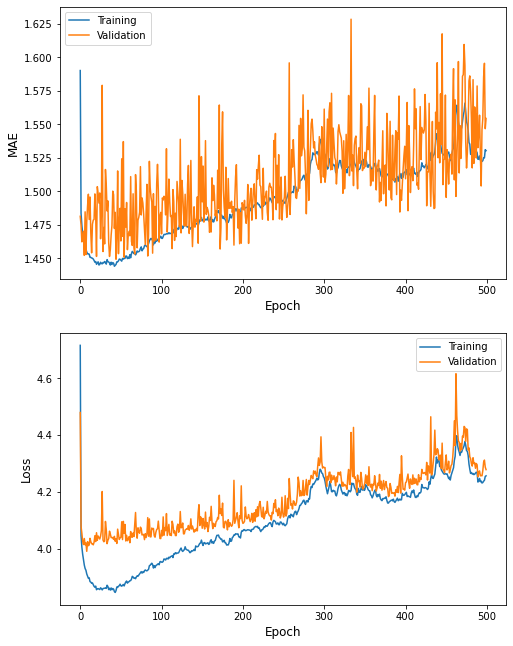

In [ ]:
# Grafiquemos la pérdida y el MAE de entrenamiento y validación a lo largo de
# las épocas de entrenamiento:

history = model.history.history

fig, ax = plt.subplots(2, 1, figsize=(8, 11))

ax[0].set_xlabel('Epoch', size=12)
ax[0].set_ylabel('MAE', size=12)
ax[0].plot(history['mae'], label='Training')
ax[0].plot(history['val_mae'], label='Validation')
ax[0].legend()

ax[1].set_xlabel('Epoch', size=12)
ax[1].set_ylabel('Loss', size=12)
ax[1].plot(history['loss'], label='Training')
ax[1].plot(history['val_loss'], label='Validation')
ax[1].legend();

In [ ]:
# Obtengamos el R^2 y el MAE de entrenamiento, validación y prueba:
print(f'Training Data:')
print(f'R^2: {r2_score(y_train, model.predict(X_train))}')
print(f'MAE: {mean_absolute_error(y_train, model.predict(X_train))}')
print('')
print(f'Validation Data:')
print(f'R^2: {r2_score(y_val, model.predict(X_val))}')
print(f'MAE: {mean_absolute_error(y_val, model.predict(X_val))}')
print('')
print(f'Test Data:')
print(f'R^2: {r2_score(y_test, model.predict(X_test))}')
print(f'MAE: {mean_absolute_error(y_test, model.predict(X_test))}')

Training Data:
R^2: 0.07576826150402938
MAE: 1.5498231649398804

Validation Data:
R^2: 0.07732603214410705
MAE: 1.5544558763504028

Test Data:
R^2: 0.07260313672403651
MAE: 1.5570522546768188


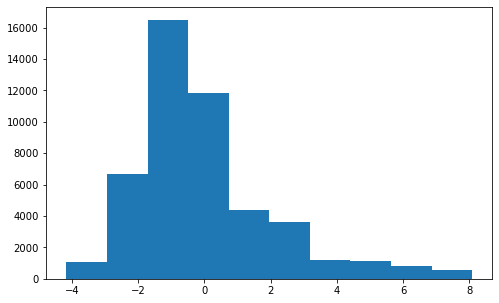

In [ ]:
# Grafiquemos un histograma del error de predicción en el conjunto de prueba:
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(y_test - model.predict(X_test).flatten());

In [ ]:
# Veamos los datos junto con las predicciones:
pd.concat([
    data_train.drop(columns='Stay').reset_index(drop=True),
    data_train['Stay'].reset_index(drop=True),
    pd.DataFrame({'predicted_Stay': model.predict(data_train.drop(columns=['Stay', 'patientid'])).flatten()})
], axis=1)

,Available Extra Rooms in Hospital,patientid,Admission_Deposit,Department_TB & Chest disease,Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,Type of Admission_Emergency,Type of Admission_Trauma,...,Age_21-30,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Age_71-80,Age_81-90,Age_91-100,Stay,predicted_Stay
0,3,31397,4911,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,3.016186
1,2,31397,5954,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,4,3.775028
2,2,31397,4745,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,3,3.183664
3,2,31397,7272,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,4,3.257705
4,2,31397,5558,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,4,4.034844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318320,3,86499,4144,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,1,2.442167
318321,2,325,6699,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,3,2.406835
318322,3,125235,4235,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,2.735625
318323,3,91081,3761,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,2.335747
